На языке Python разработайте скрипт, кластеризующий загруженные данные о возрасте n людей на определенные им кластеры, обозначенные заданными в программе лингвистическими метками. Максимальное количество меток задать самостоятельно.

In [81]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [91]:
# я не нашел возрастных датасетов, поэтому сделаем так.
ages = np.array([15, 22, 25, 30, 34, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85])
labels = ["Молодой", "Взрослый", "Пожилой"]

In [92]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(ages.reshape(-1, 1))

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [93]:
# Будем через центры кластеров присваивать лингвистические метки
centroids = kmeans.cluster_centers_

In [94]:
sorted_centroids_indices = np.argsort(centroids.flatten())
sorted_labels = [labels[i] for i in sorted_centroids_indices]

In [95]:
cluster_labels = kmeans.predict(ages.reshape(-1, 1))

In [96]:
def assign_labels(cluster_labels, sorted_labels):
    unique_clusters = np.unique(cluster_labels)
    cluster_to_label = {cluster: sorted_labels[i] for i, cluster in enumerate(unique_clusters)}
    return [cluster_to_label[cluster] for cluster in cluster_labels]

In [97]:
linguistic_labels = assign_labels(cluster_labels, sorted_labels)

In [98]:
for age, label in zip(ages, linguistic_labels):
    print(f"Age: {age}, Label: {label}")

Age: 15, Label: Молодой
Age: 22, Label: Молодой
Age: 25, Label: Молодой
Age: 30, Label: Молодой
Age: 34, Label: Молодой
Age: 40, Label: Молодой
Age: 45, Label: Взрослый
Age: 50, Label: Взрослый
Age: 55, Label: Взрослый
Age: 60, Label: Взрослый
Age: 65, Label: Пожилой
Age: 70, Label: Пожилой
Age: 75, Label: Пожилой
Age: 80, Label: Пожилой
Age: 85, Label: Пожилой


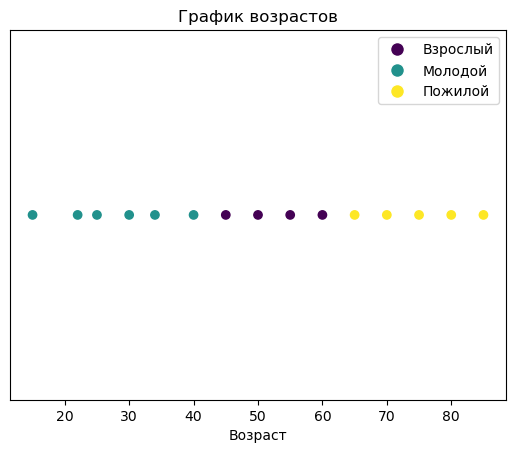

In [110]:
plt.scatter(ages, np.zeros_like(ages), c=cluster_labels, cmap='viridis')
colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=sorted_labels[i]) for i in range(num_clusters)]
plt.legend(handles=legend_elements)
plt.xlabel('Возраст')
plt.title('График возрастов')
plt.yticks([])
plt.show()